# Bonus Challenge 2 - ANOVA

In statistics, **Analysis of Variance (ANOVA)** is also used to analyze the differences among group means. The difference between t-test and ANOVA is the former is ued to compare two groups whereas the latter is used to compare three or more groups. [Read more about the difference between t-test and ANOVA](http://b.link/anova24).

From the ANOVA test, you receive two numbers. The first number is called the **F-value** which indicates whether your null-hypothesis can be rejected. The critical F-value that rejects the null-hypothesis varies according to the number of total subjects and the number of subject groups in your experiment. In [this table](http://b.link/eda14) you can find the critical values of the F distribution. **If you are confused by the massive F-distribution table, don't worry. Skip F-value for now and study it at a later time. In this challenge you only need to look at the p-value.**

The p-value is another number yielded by ANOVA which already takes the number of total subjects and the number of experiment groups into consideration. **Typically if your p-value is less than 0.05, you can declare the null-hypothesis is rejected.**

In this challenge, we want to understand whether there are significant differences among various types of pokemons' `Total` value, i.e. Grass vs Poison vs Fire vs Dragon... There are many types of pokemons which makes it a perfect use case for ANOVA. Use Ironhack's database to load the pokemon data (db: pokemon, table: pokemon_stats). 

In [3]:
# Import libraries
import pandas as pd
from scipy.stats import f_oneway
import statsmodels.api as sm

In [4]:
# H0: There are no differences among type of pokemons' total value
# H1: There are differences among type of pokemons' total value

# Load the data:
pokemon = pd.read_csv("./Pokemon.csv")
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


**To achieve our goal, we use three steps:**

1. **Extract the unique values of the pokemon types.**

1. **Select dataframes for each unique pokemon type.**

1. **Conduct ANOVA analysis across the pokemon types.**

#### First let's obtain the unique values of the pokemon types. These values should be extracted from Type 1 and Type 2 aggregated. Assign the unique values to a variable called `unique_types`.

*Hint: the correct number of unique types is 19 including `NaN`. You can disregard `NaN` in next step.*

In [5]:
# Your code here
types = pd.concat([pokemon["Type 1"],pokemon["Type 2"]],axis=0)
unique_types = types.unique()
unique_types = pd.DataFrame(unique_types)
unique_types.columns = ["Type"]

unique_types = unique_types["Type"].tolist()
unique_types

len(unique_types) # you should see 19

19

In [18]:
pokemon_type_1 = pd.concat([pokemon["Type 1"],pokemon["Total"]],axis=1)
pokemon_type_1

,Type 1,Total
0,Grass,318
1,Grass,405
2,Grass,525
3,Grass,625
4,Fire,309
...,...,...
795,Rock,600
796,Rock,700
797,Psychic,600
798,Psychic,680


#### Second we will create a list named `pokemon_totals` to contain the `Total` values of each unique type of pokemons.

Why we use a list instead of a dictionary to store the pokemon `Total`? It's because ANOVA only tells us whether there is a significant difference of the group means but does not tell which group(s) are significantly different. Therefore, we don't need know which `Total` belongs to which pokemon type.

*Hints:*

* Loop through `unique_types` and append the selected type's `Total` to `pokemon_groups`.
* Skip the `NaN` value in `unique_types`. `NaN` is a `float` variable which you can find out by using `type()`. The valid pokemon type values are all of the `str` type.
* At the end, the length of your `pokemon_totals` should be 18.

In [57]:
pokemon_totals = []
unique_type = []

for typ in list(unique_types):
    if type(typ) == str:
        pokemon_totals.append(list(pokemon[(pokemon["Type 1"] == typ)]["Total"]))
        unique_type.append(typ)
pokemon_totals

len(pokemon_totals) # you should see 18
# pokemon_totals

# create a list for each pokemon type (grass list with all totals)

# Solution:
# for typ in list(unique_types):
#     if isinstance(typ, str):
#         totals_type = pokemon[(pokemon["Type 1"] == type) | (pokemon["Type 2"] == type)]
#         pokemon_totals.append(totals_typ)



18

In [90]:
df = pd.DataFrame(pokemon_totals).transpose()
df.columns = unique_type
df

,Grass,Fire,Water,Bug,Normal,Poison,Electric,Ground,Fairy,Fighting,Psychic,Rock,Ghost,Ice,Dragon,Dark,Steel,Flying
0,318.0,309.0,314.0,195.0,251.0,288.0,320.0,300.0,323.0,305.0,310.0,300.0,310.0,455.0,300.0,525.0,510.0,580.0
1,405.0,405.0,405.0,205.0,349.0,438.0,485.0,450.0,483.0,455.0,400.0,390.0,405.0,580.0,420.0,405.0,610.0,580.0
2,525.0,534.0,530.0,395.0,479.0,275.0,325.0,265.0,218.0,305.0,500.0,495.0,500.0,250.0,600.0,430.0,465.0,245.0
3,625.0,634.0,630.0,195.0,579.0,365.0,465.0,405.0,245.0,405.0,590.0,385.0,600.0,450.0,490.0,330.0,380.0,535.0
4,320.0,634.0,320.0,205.0,253.0,505.0,330.0,320.0,405.0,505.0,328.0,355.0,435.0,330.0,590.0,500.0,480.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,NaN,NaN,314.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108,NaN,NaN,405.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109,NaN,NaN,530.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110,NaN,NaN,330.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
test = pd.DataFrame(set(unique_type))
pivot = test.pivot(index=pokemon_totals, columns=unique_type)
pivot.columns = ['Pokemon'+str(x) for x in pivot.columns.values]
pivot.head()

TypeError: unhashable type: 'list'

In [12]:
# # Calculate totals for type 1
# type_1 = pokemon["Total"].groupby(pokemon["Type 1"]).agg("sum")
# pd.DataFrame(type_1).reset_index()

# # Calculate totals for type 2
# type_2 = pokemon["Total"].groupby(pokemon["Type 2"]).agg("sum")
# pd.DataFrame(type_2).reset_index()

# # Combine totals for type 1 and 2
# types = pd.concat([type_1,type_2], axis=1)
# types.columns = ["Type 1 Total", "Type 2 Total"]
# # types.rename(columns={"index":"Type"})
# types.reset_index()

# # Add sum of type 1 and type 2
# types["Sum"] = types["Type 1 Total"] + types["Type 2 Total"]
# types.reset_index()
# types

# # Set in list
# pokemon_totals = list(types["Sum"])
# # pokemon_totals

In [ ]:
pokemon_totals = []


pokemon[(pokemon["Type 1"] == "Grass")]["Total"]


In [ ]:
list(pokemon[(pokemon["Type 1"] == "Grass")])

In [9]:
pokemon_totals = pd.DataFrame(unique_types)
pokemon_totals

,0
0,Grass
1,Fire
2,Water
3,Bug
4,Normal
5,Poison
6,Electric
7,Ground
8,Fairy
9,Fighting


#### Now we run ANOVA test on `pokemon_totals`.

*Hints:*

* To conduct ANOVA, you can use `scipy.stats.f_oneway()`. Here's the [reference](http://b.link/scipy44).

* What if `f_oneway` throws an error because it does not accept `pokemon_totals` as a list? The trick is to add a `*` in front of `pokemon_totals`, e.g. `stats.f_oneway(*pokemon_groups)`. This trick breaks the list and supplies each list item as a parameter for `f_oneway`.

In [93]:
df.columns

Index(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'],
      dtype='object')

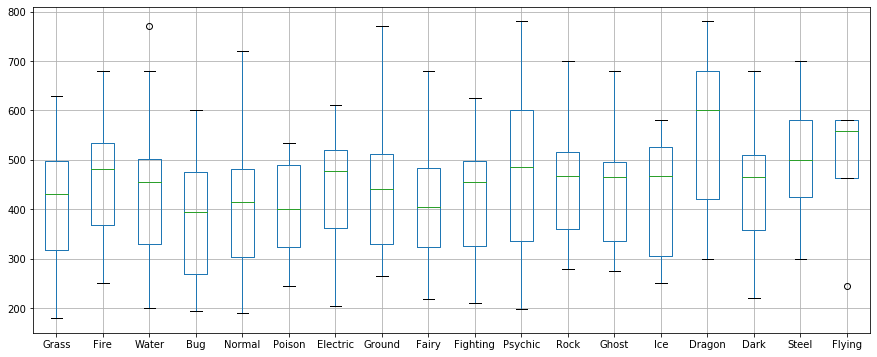

In [103]:
df.boxplot(figsize=(15,6))

In [14]:
unique_types

['Grass',
 'Fire',
 'Water',
 'Bug',
 'Normal',
 'Poison',
 'Electric',
 'Ground',
 'Fairy',
 'Fighting',
 'Psychic',
 'Rock',
 'Ghost',
 'Ice',
 'Dragon',
 'Dark',
 'Steel',
 'Flying',
 nan]

In [17]:
unique_types = pokemon["Type 1"].append(pokemon["Type 2"]).unique()
unique_types

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying', nan], dtype=object)

In [22]:
# Solution:
pokemon_totals = []

for typ in unique_types:
    if isinstance(typ, str):
        totals_type = pokemon[(pokemon["Type 1"] == type) | (pokemon["Type 2"] == type)]["Total"]
        pokemon_totals.append(totals_type)
len(pokemon_totals)

18

In [19]:
pokemon_totals[0]

Series([], Name: Total, dtype: int64)

In [21]:
f_oneway(*pokemon_totals)

F_onewayResult(statistic=nan, pvalue=nan)

In [ ]:
# f_oneway(df["Grass"],df["Fire"],df["Water"],df["Bug"])

#### Interpret the ANOVA test result. Is the difference significant?

In [ ]:
"""
If p < 0.05 we reject the null hypothesis and conclude that there is a significant
difference between total score for each type of pokemon. We cannot make
any assumptions as to where the differences lie and the magnitude of the effect.
"""